In [1]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

chunk = 'chunk21'

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk21_200per_matched.fits'
fn2 = 'dr3_elgs_really_masked_chunk21.fits'
fn_obiwan = 'sgc_run_obiwan_really_masked_chunk21.fits'
fn_sim = 'sgc_run_sim_really_masked_chunk21.fits'
DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)
sim = fits.getdata(topdir+fn_sim)
sim_m=sim
DAT2 = fits.getdata(topdir+fn2)

Populating the interactive namespace from numpy and matplotlib


-0.0790656386141


Text(0,0.5,'output flux g')

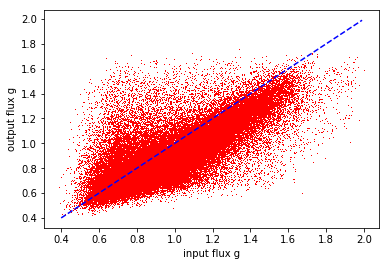

In [18]:
plt.plot(obiwan['sim_gflux'],obiwan['flux_g'],'r,')
x = np.arange(0.4,2.0,0.01)
y =x 
plt.plot(x,y,'b--')
#plt.plot(x,x-0.4,'b--')
#plt.plot(x,x+0.4,'b--')
print((obiwan['flux_g']-obiwan['sim_gflux']).mean())
plt.xlabel('input flux g')
plt.ylabel('output flux g')

-0.112971766316


Text(0,0.5,'output flux r')

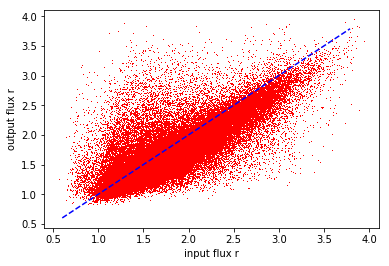

In [15]:
plt.plot(obiwan['sim_rflux'],obiwan['flux_r'],'r,')
x = np.arange(0.6,3.8,0.01)
y =x 
plt.plot(x,y,'b--')
print((obiwan['flux_r']-obiwan['sim_rflux']).mean())
plt.xlabel('input flux r')
plt.ylabel('output flux r')

-0.2531198166


Text(0,0.5,'output flux r')

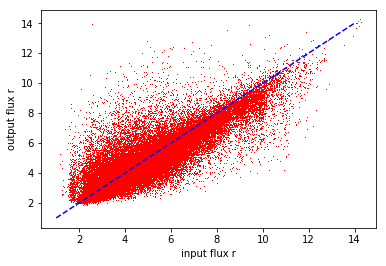

In [22]:
plt.plot(obiwan['sim_zflux'],obiwan['flux_z'],'r,')
x = np.arange(1,14,0.01)
y =x 
plt.plot(x,y,'b--')
print((obiwan['flux_z']-obiwan['sim_zflux']).mean())
plt.xlabel('input flux r')
plt.ylabel('output flux r')

In [23]:
#+/-2 sigma for sim flux
def dependency_hist(doutput,dinput,vmin,vmax,bins):
    interval = (vmax-vmin)/bins
    total_N_perbin = np.zeros(bins)
    hist = np.zeros(bins)
    outbin = 0
    var_tmp = [[] for i in range(bins)]
    for i in range(len(dinput)):
        if dinput[i]>=vmin and dinput[i]<vmax:
            n = int((dinput[i]-vmin)/interval)
            total_N_perbin[n] += 1
            var_tmp[n].append(dinput[i]-doutput[i])
            hist[n] += dinput[i]-doutput[i]
        else:
            outbin+=1
    lvar = [np.array(var_tmp[i]).std() for i in range(bins)]
    array_var = np.array(lvar)
    print('%d outbin' %outbin)
    x_axis = [vmin+interval*i for i in range(bins)]
    return total_N_perbin,hist,x_axis,array_var

In [24]:
(obiwan['sim_zflux']-obiwan['flux_z']).std()

0.79262959734258642

1471 outbin


Text(0.5,1,'# of targets per bin')

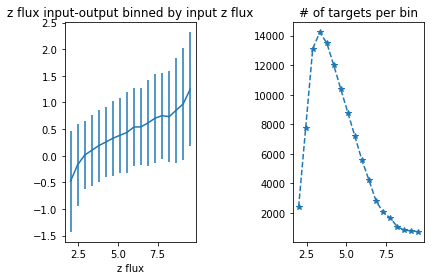

In [26]:
flux_type = 'z'
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type],obiwan['sim_'+flux_type+'flux'],2,10,18)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel(flux_type+' flux')
plt.title(flux_type+' flux input-output binned by input '+flux_type+' flux')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

3607 outbin


Text(0.5,1,'# of targets per bin')

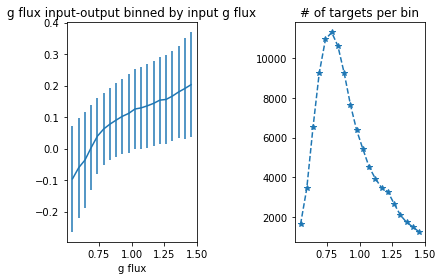

In [27]:
flux_type = 'g'
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type],obiwan['sim_'+flux_type+'flux'],0.55,1.5,20)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel(flux_type+' flux')
plt.title(flux_type+' flux input-output binned by input '+flux_type+' flux')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

2902 outbin


Text(0.5,1,'# of targets per bin')

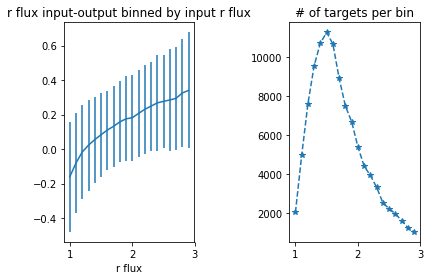

In [97]:
flux_type = 'r'
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type],obiwan['sim_'+flux_type+'flux'],1.0,3.0,20)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel(flux_type+' flux')
plt.title(flux_type+' flux input-output binned by input '+flux_type+' flux')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

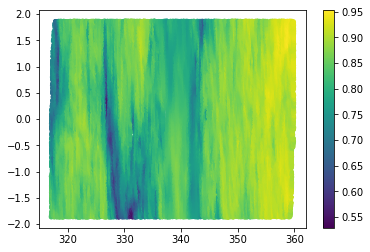

In [104]:
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['mw_transmission_g'],marker='.')
plt.colorbar()

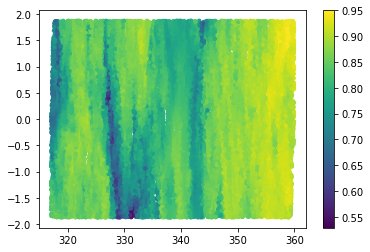

In [3]:
plt.scatter(DAT['ra'],DAT['dec'],c=10**(-0.4*3.214*DAT['ebv']), marker='.')
plt.colorbar()

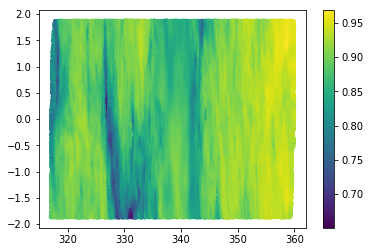

In [105]:
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['mw_transmission_r'],marker='.')
plt.colorbar()

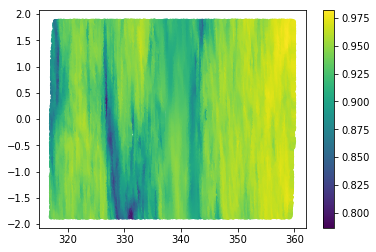

In [106]:
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['mw_transmission_z'],marker='.')
plt.colorbar()

1575 outbin


Text(0.5,1,'# of targets per bin')

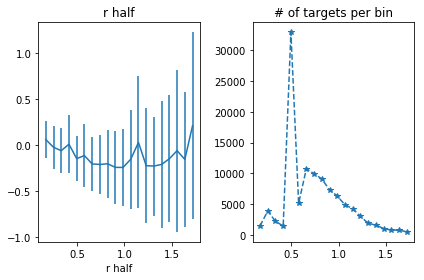

In [28]:
totalbinN, hist,x_axis,array_var = dependency_hist(obiwan['shapeexp_r'],obiwan['sim_rhalf'],0.17,1.8,20)
plt.subplot(1,2,1)
plt.errorbar(x_axis,hist/totalbinN,array_var)
plt.xlabel('r half')
plt.title('r half')
plt.subplot(1,2,2)
plt.plot(x_axis,totalbinN,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')

In [29]:
#+/-2 sigma for sim flux
def dependency_hist(d_to_measure,dinput,vmin=0.7,vmax=0.95,bins=10):
    interval = (vmax-vmin)/bins
    total_N_perbin = np.zeros(bins)
    hist = np.zeros(bins)
    outbin = 0
    var_tmp = [[] for i in range(bins)]
    for i in range(len(dinput)):
        if dinput[i]>=vmin and dinput[i]<vmax:
            n = int((dinput[i]-vmin)/interval)
            total_N_perbin[n] += 1
            var_tmp[n].append(d_to_measure[i])
            hist[n] += d_to_measure[i]
        else:
            outbin+=1
    lvar = [np.array(var_tmp[i]).std() for i in range(bins)]
    array_var = np.array(lvar)
    print('%d outbin' %outbin)
    x_axis = [vmin+interval*i for i in range(bins)]
    return total_N_perbin,hist,x_axis,array_var

3500 outbin
3500 outbin


Text(0.5,1,'absolute r flux diff')

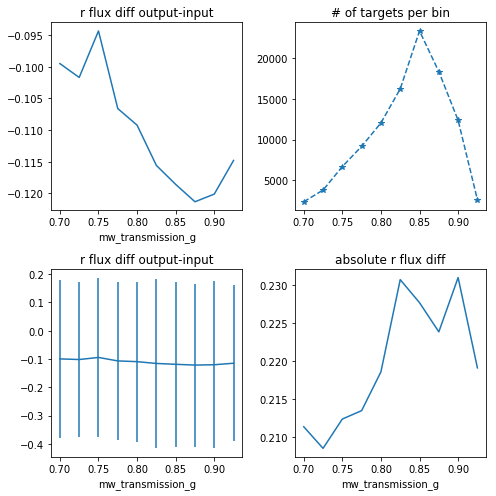

In [30]:
plt.figure(figsize=(7,7))
flux_type = 'r'
total_N_perbin,hist,x_axis,array_var = dependency_hist(obiwan['flux_'+flux_type] - obiwan['sim_'+flux_type+'flux'],obiwan['mw_transmission_g'])
plt.subplot(2,2,1)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.plot(x_axis,hist/total_N_perbin)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.xlabel('mw_transmission_g')
plt.title(flux_type+' flux diff output-input')
plt.subplot(2,2,2)
plt.plot(x_axis,total_N_perbin,marker='*',linestyle='--')
plt.tight_layout()
plt.title('# of targets per bin')
plt.subplot(2,2,3)
plt.errorbar(x_axis,hist/total_N_perbin,array_var)
#plt.plot(x_axis,hist/total_N_perbin)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.xlabel('mw_transmission_g')
plt.title(flux_type+' flux diff output-input')
plt.tight_layout()
plt.subplot(2,2,4)
total_N_perbin,hist,x_axis,array_var = dependency_hist(np.fabs(obiwan['flux_'+flux_type] - obiwan['sim_'+flux_type+'flux']),obiwan['mw_transmission_g'])
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.plot(x_axis,hist/total_N_perbin)
#plt.errorbar(x_axis,hist/total_N_perbin,array_var)
plt.xlabel('mw_transmission_g')
plt.title('absolute '+flux_type+' flux diff')

Text(0.5,15,'mw_transmission_g')

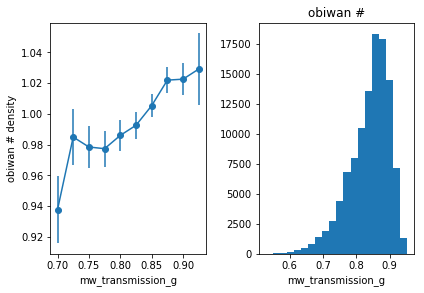

In [31]:
def desnity_dependency(obiwan = obiwan, vmin=0.7,vmax=0.95,bins=10):
    MAP = sim['mw_transmission_g']
    MAP2 = obiwan['mw_transmission_g']
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(obiwan))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = obiwan[(MAP2>=vmin+i*interval)&(MAP2<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
        #total_obiwan_var[i] = per_obiwan.std()
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y,err,x = desnity_dependency()

plt.subplot(1,2,1)
plt.errorbar(x,y,err,marker = 'o')
plt.xlabel('mw_transmission_g')
plt.ylabel('obiwan # density')
plt.subplot(1,2,2)
p = plt.hist(obiwan['mw_transmission_g'],bins=20)
plt.tight_layout()
plt.title('obiwan #')
plt.xlabel('mw_transmission_g')

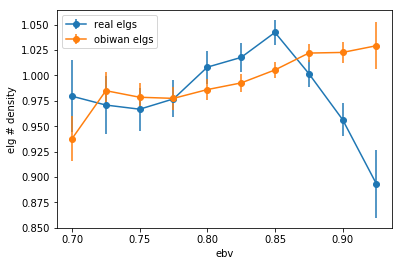

In [32]:
def desnity_dependency_DAT(obiwan = DAT, vmin=0.7,vmax=0.95,bins=10):
    DAT_MAP = 10**(-0.4*3.214*DAT['ebv'])
    MAP = sim['mw_transmission_g']
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(DAT))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = DAT[(DAT_MAP>=vmin+i*interval)&(DAT_MAP<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        #total_obiwan_var[i] = per_obiwan.std()
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y3,err3,x3 = desnity_dependency_DAT()
plt.errorbar(x3,y3,err3,marker = 'o',label = 'real elgs')
plt.errorbar(x,y,err,marker = 'o',label = 'obiwan elgs')
plt.xlabel('ebv')
plt.ylabel('elg # density')
plt.legend()

Text(0.5,15,'mw_transmission_g')

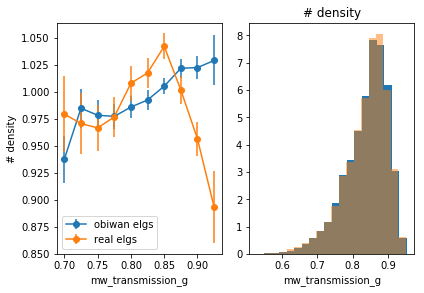

In [33]:
plt.subplot(1,2,1)
plt.errorbar(x,y,err,marker = 'o',label = 'obiwan elgs')
plt.errorbar(x3,y3,err3,marker = 'o',label = 'real elgs')
plt.xlabel('mw_transmission_g')
plt.legend()
plt.ylabel('# density')
plt.subplot(1,2,2)
p = plt.hist(obiwan['mw_transmission_g'],bins=20,normed=True)
#p = plt.hist(gdat,bins=20,normed=True,alpha=0.5)
p = plt.hist(10**(-0.4*3.214*DAT['ebv']),bins=20,alpha=0.5,normed=True)
plt.tight_layout()
plt.title('# density')
plt.xlabel('mw_transmission_g')

In [373]:
-np.log10(0.7)/0.4/3.214,-np.log10(0.95)/0.4/3.214

(0.1204900124344611, 0.017327625008674744)

In [34]:
def desnity_dependency(obiwan = obiwan, vmin=0.017,vmax=0.12,bins=10):
    MAP = -np.log10(sim['mw_transmission_g'])/(0.4*3.214)
    MAP2 = -np.log10(obiwan['mw_transmission_g'])/(0.4*3.214)
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(obiwan))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = obiwan[(MAP2>=vmin+i*interval)&(MAP2<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
        #total_obiwan_var[i] = per_obiwan.std()
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y,err,x = desnity_dependency()

In [35]:
def desnity_dependency_DAT(obiwan = DAT, vmin=0.017,vmax=0.12,bins=10):
    DAT_MAP = DAT['ebv']
    MAP = -np.log10(sim['mw_transmission_g'])/(0.4*3.214)
    interval = (vmax-vmin)/bins
    total_sim_perbin = np.zeros(bins)
    #total_sim_var = np.zeros(bins)
    total_obiwan_perbin = np.zeros(bins)
    #total_obiwan_var = np.zeros(bins)
    outbin = 0
    nse = np.zeros(bins)
    ave = float(len(DAT))/float(len(sim))
    for i in range(bins):
        per_sim = sim[(MAP>=vmin+i*interval)&(MAP<vmin+(i+1)*interval)]
        n_sim = len(per_sim)
        per_obiwan = DAT[(DAT_MAP>=vmin+i*interval)&(DAT_MAP<vmin+(i+1)*interval)]
        n_obiwan = len(per_obiwan)
        total_sim_perbin[i] = n_sim
        #total_sim_var[i] = per_sim.std()
        total_obiwan_perbin[i] = n_obiwan
        #total_obiwan_var[i] = per_obiwan.std()
        nse[i] = sqrt(n_obiwan/(n_sim)**2./(ave)**2.+(n_obiwan/ave)**2./(n_sim)**3.)
    x_axis = [vmin+interval*i for i in range(bins)]
    coeff = total_sim_perbin.sum()/total_obiwan_perbin.sum()
    
    return coeff*total_obiwan_perbin/total_sim_perbin,nse,x_axis

y3,err3,x3 = desnity_dependency_DAT()

In [390]:
err3

array([ 0.02921994,  0.01424948,  0.01229806,  0.0123807 ,  0.01476247,
        0.01722431,  0.01886859,  0.02358065,  0.03110434,  0.03812681])

Text(0.5,15,'ebv')

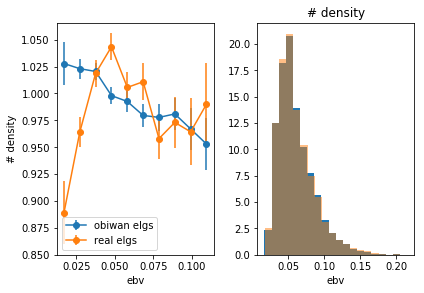

In [36]:
plt.subplot(1,2,1)
plt.errorbar(x,y,err,marker = 'o',label = 'obiwan elgs')
plt.errorbar(x3,y3,err3,marker = 'o',label = 'real elgs')
plt.xlabel('ebv')
plt.legend()
plt.ylabel('# density')
plt.subplot(1,2,2)
p = plt.hist(-np.log10(obiwan['mw_transmission_g'])/(0.4*3.214),bins=20,normed=True)
#p = plt.hist(gdat,bins=20,normed=True,alpha=0.5)
p = plt.hist(DAT['ebv'],bins=20,alpha=0.5,normed=True)

plt.tight_layout()
plt.title('# density')
plt.xlabel('ebv')

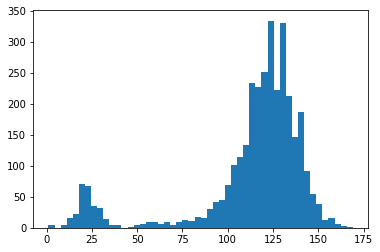

In [15]:
p = plt.hist(f_mw_g_counts,bins=50)
#choose 75 as the cut

In [29]:
import healpy as hp
res=256
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'],nest = True, lonlat = True)
pix_DAT = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = True, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = True, lonlat = True)

N = 12*res**2
mw_g_counts = np.zeros(N, dtype = np.float)
mw_g_value = np.zeros(N, dtype = np.float)
ids = np.arange(N)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    mw_g_counts[n]+=1
    mw_g_value[n]+=sim['mw_transmission_g'][i]
f_mw_g_counts = mw_g_counts[mw_g_counts>75]
f_mw_g_value = mw_g_value[mw_g_counts>75]
f_ids = ids[mw_g_counts>75]
mw_g_avg = f_mw_g_value/f_mw_g_counts


#MAP = np.hstack((f_ids, mw_g_avg))


vmin = 0.70
vmax = 0.95
bins = 15
interval = (vmax-vmin)/bins

#sim
tot_r = 0
binning_r = np.zeros(bins)
for i in range(len(sim)):
    n = pix_sim[i]
    mw_g_avg_i_arr  = mw_g_avg[f_ids==n]
    if len(mw_g_avg_i_arr)==1:
        mw_g_avg_i = mw_g_avg_i_arr[0]
        tot_r+=1
        if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_r[bin_num]+=1
            
#obiwan
tot_o = 0
binning_o = np.zeros(bins)
for i in range(len(obiwan)):
    n = pix_obiwan[i]
    mw_g_avg_i_arr  = mw_g_avg[f_ids==n]
    if len(mw_g_avg_i_arr)==1:
        mw_g_avg_i = mw_g_avg_i_arr[0]
        tot_o+=1
        if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_o[bin_num]+=1
            
#DAT
tot_g = 0
binning_g = np.zeros(bins)
for i in range(len(DAT)):
    n = pix_DAT[i]
    mw_g_avg_i_arr  = mw_g_avg[f_ids==n]
    if len(mw_g_avg_i_arr)==1:
        mw_g_avg_i = mw_g_avg_i_arr[0]
        tot_g+=1
        if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_g[bin_num]+=1

ave_gr = tot_g/tot_r
ave_or = tot_o/tot_r
coeff_o = binning_r.sum()/binning_o.sum()
coeff_g = binning_r.sum()/binning_g.sum()
y_obiwan = binning_o/binning_r*coeff_o 
y_DAT = binning_g/binning_r*coeff_g
y_obiwan_err = np.sqrt(binning_o/(binning_r)**2./(ave_or)**2.+(binning_o/ave_or)**2./(binning_r)**3.)
y_DAT_err = np.sqrt(binning_g/(binning_r)**2./(ave_gr)**2.+(binning_g/ave_gr)**2./(binning_r)**3.)

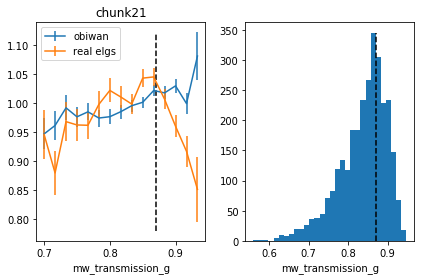

In [30]:
plt.subplot(1,2,1)
x_axis = [vmin+interval*i for i in range(bins)]
plt.errorbar(x_axis, y_obiwan, y_obiwan_err, label = 'obiwan')
plt.errorbar(x_axis, y_DAT, y_DAT_err, label = 'real elgs')
plt.xlabel('mw_transmission_g')
y=np.arange(0.78, 1.13, 0.01)
x = np.ones(len(y))*0.87
plt.plot(x,y, 'k--')
plt.title('chunk21')
plt.legend()
plt.subplot(1,2,2)
#vmax, vmin is determined via this plot
plt.hist(mw_g_avg,bins=30)
plt.xlabel('mw_transmission_g')
y = np.arange(0, 350, 5)
x = np.ones(len(y))*0.87
plt.plot(x,y, 'k--')
plt.tight_layout()

In [32]:
np.savetxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/systematics/obiwan_200per_chunk21',\
          np.vstack((x_axis, y_obiwan, y_obiwan_err)))

In [33]:
np.savetxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/systematics/real_elg_chunk21',\
          np.vstack((x_axis, y_DAT, y_DAT_err)))

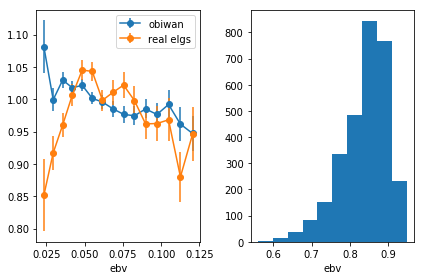

In [34]:
plt.subplot(1,2,1)
x_axis = [vmin+interval*i for i in range(bins)]
plt.errorbar(-np.log10(x_axis)/(0.4*3.214), y_obiwan, y_obiwan_err, label = 'obiwan', marker = 'o')
plt.errorbar(-np.log10(x_axis)/(0.4*3.214), y_DAT, y_DAT_err, label = 'real elgs', marker = 'o')
plt.xlabel('ebv')
plt.legend()
plt.subplot(1,2,2)
#vmax, vmin is determined via this plot
plt.hist(mw_g_avg)
plt.xlabel('ebv')
plt.tight_layout()

In [35]:
#w/ sys map
fn_sys = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/sysmap/ELG_hpsyst.density.nside256.eboss21.fits'
sys_map = fits.getdata(fn_sys)

In [36]:
sys_map['hpebv'],sys_map['hpind']

(array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 array([     0,      1,      2, ..., 786429, 786430, 786431]))

In [61]:
import healpy as hp
res=256
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'],nest = False, lonlat = True)
pix_DAT = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = False, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = False, lonlat = True)

N = 12*res**2


vmin = 0.017
vmax = 0.12
bins = 15
interval = (vmax-vmin)/bins

#sim
tot_r = 0
binning_r = np.zeros(bins)
for i in range(len(sim)):
    n = pix_sim[i]
    mw_g_avg_i  = sys_map['hpebv'][n]
    tot_r+=1
    if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
        bin_num = int((mw_g_avg_i-vmin)/interval)
        binning_r[bin_num]+=1

In [62]:
#obiwan
tot_o = 0
binning_o = np.zeros(bins)
for i in range(len(obiwan)):
    n = pix_obiwan[i]
    mw_g_avg_i = sys_map['hpebv'][n]
    tot_o+=1
    if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_o[bin_num]+=1
            
#DAT
tot_g = 0
binning_g = np.zeros(bins)
for i in range(len(DAT)):
    n = pix_DAT[i]
    mw_g_avg_i  = sys_map['hpebv'][n]
    tot_g+=1
    if mw_g_avg_i>=vmin and mw_g_avg_i<vmax:
            bin_num = int((mw_g_avg_i-vmin)/interval)
            binning_g[bin_num]+=1

In [63]:
ave_gr = tot_g/tot_r
ave_or = tot_o/tot_r
coeff_o = binning_r.sum()/binning_o.sum()
coeff_g = binning_r.sum()/binning_g.sum()
y_obiwan = binning_o/binning_r*coeff_o 
y_DAT2 = binning_g/binning_r*coeff_g
y_obiwan_err = np.sqrt(binning_o/(binning_r)**2./(ave_or)**2.+(binning_o/ave_or)**2./(binning_r)**3.)
y_DAT_err2 = np.sqrt(binning_g/(binning_r)**2./(ave_gr)**2.+(binning_g/ave_gr)**2./(binning_r)**3.)

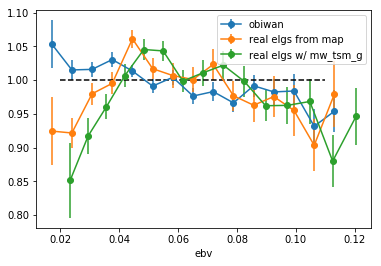

In [65]:
x_axis = [vmin+interval*i for i in range(bins)]
plt.errorbar(x_axis, y_obiwan, y_obiwan_err, label = 'obiwan', marker = 'o')
plt.errorbar(x_axis, y_DAT2, y_DAT_err2, label = 'real elgs from map', marker = 'o')
plt.errorbar(-np.log10(x_axis2)/(0.4*3.214), y_DAT, y_DAT_err, label = 'real elgs w/ mw_tsm_g', marker = 'o')
plt.xlabel('ebv')
plt.legend()
y=np.arange(0.02,0.12,0.01)
x=np.ones(len(y))
plt.plot(y,x,'k--')

In [43]:
vmin = 0.70
vmax = 0.95
bins = 15
interval = (vmax-vmin)/bins
x_axis2 = [vmin+interval*i for i in range(bins)]
-np.log10(x_axis2)/(0.4*3.214)

array([ 0.12049001,  0.11254107,  0.10477487,  0.09718321,  0.08975842,
        0.0824933 ,  0.07538116,  0.06841566,  0.06159089,  0.05490127,
        0.04834156,  0.0419068 ,  0.03559232,  0.02939372,  0.0233068 ])

In [59]:
-np.log10(0.70)/(0.4*3.214)

0.12049001243446109

In [60]:
-np.log10(0.95)/(0.4*3.214)

0.017327625008674744

In [40]:
import healpy as hp
res=256
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'],nest = False, lonlat = True)
pix_DAT = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = False, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = True, lonlat = True)

N = 12*res**2
mw_g_counts = np.zeros(N, dtype = np.float)
mw_g_value = np.zeros(N, dtype = np.float)
ids = np.arange(N)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    mw_g_counts[n]+=1
    mw_g_value[n]+=sim['mw_transmission_g'][i]
f_mw_g_counts = mw_g_counts[mw_g_counts>75]
f_mw_g_value = mw_g_value[mw_g_counts>75]
f_ids = ids[mw_g_counts>75]
mw_g_avg = f_mw_g_value/f_mw_g_counts

In [41]:
#w/ sys map
fn_sys = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/sysmap/ELG_hpsyst.density.nside256.eboss21.fits'
sys_map = fits.getdata(fn_sys)

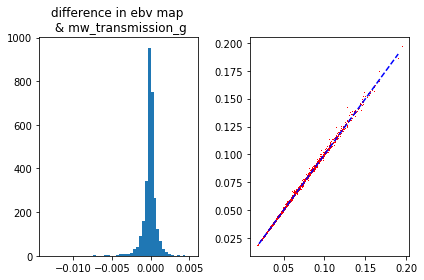

In [66]:
plt.subplot(1,2,1)
p1 = plt.hist(sys_map[f_ids]['hpebv']+np.log10(mw_g_avg)/(0.4*3.214),bins=50)
plt.title('difference in ebv map \n & mw_transmission_g')
plt.subplot(1,2,2)
p1 = plt.plot(sys_map[f_ids]['hpebv'],-np.log10(mw_g_avg)/(0.4*3.214),'r,')
x = np.arange(0.02,0.20,0.01)
y = x
plt.plot(x,y,'b--')
plt.tight_layout()

In [62]:
x

array([ 0.05])

In [68]:
elg_w_z = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out//subset/eBOSS_ELG_full_ALL_v4.dat.fits')

In [69]:
stars = elg_w_z[elg_w_z['IMATCH']==4]

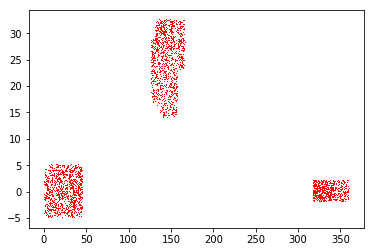

In [71]:
plt.plot(stars['ra'],stars['dec'],'r,')

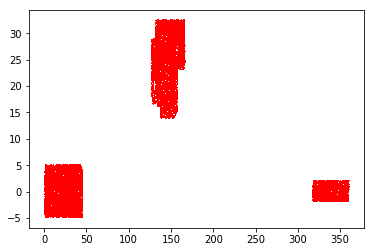

In [76]:
might_stars = elg_w_z[elg_w_z['IMATCH']==7]
plt.plot(might_stars['ra'],might_stars['dec'],'r,')

(-5, 5)

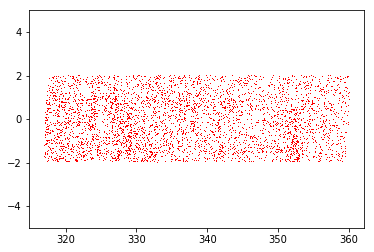

In [87]:
might_stars_chunk21 = elg_w_z[(elg_w_z['IMATCH']==7)&(elg_w_z['chunk']=='eboss21')]
plt.plot(might_stars_chunk21['ra'],might_stars_chunk21['dec'],'r,')
plt.gca().set_ylim((-5,5))

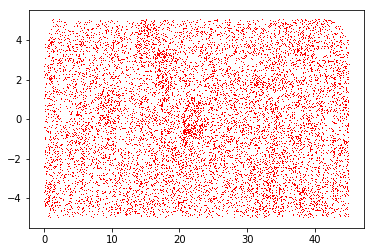

In [85]:
might_stars_chunk21 = elg_w_z[(elg_w_z['IMATCH']==7)&(elg_w_z['chunk']=='eboss22')]
plt.plot(might_stars_chunk21['ra'],might_stars_chunk21['dec'],'r,')

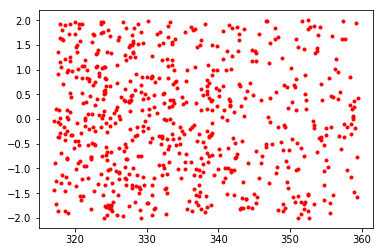

In [83]:
stars = elg_w_z[(elg_w_z['IMATCH']==4)&(elg_w_z['chunk']=='eboss21')]
plt.plot(stars['ra'],stars['dec'],'r.')

In [88]:
len(stars)

651

In [89]:
len(might_stars_chunk21)

4222

In [ ]:
(g>21.825)&(g<22.825)

In [104]:
g_low = 21.825
g_high = 22.825

In [106]:
mw_transmission_g = np.arange(0.65,0.95,0.01)
flux_g_low = 10**((-g_high+22.5)/2.5)*mw_transmission_g
flux_g_high = 10**((-g_low+22.5)/2.5)*mw_transmission_g

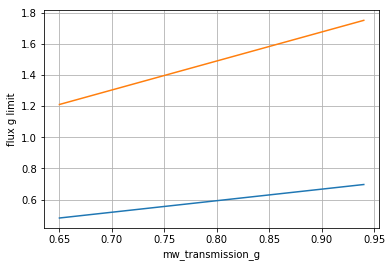

In [107]:
plt.plot(mw_transmission_g , flux_g_low)
plt.plot(mw_transmission_g , flux_g_high)
plt.xlabel('mw_transmission_g')
plt.ylabel('flux g limit')
plt.grid()

In [96]:
mw_transmission_g

array([ 0.65])

In [112]:
22.5 - 2.5 * np.log10(1./ 0.85)

22.323547314285733

In [114]:
22.5 - 2.5 * np.log10(1.35/ 0.85)

21.997712893048217

In [115]:
22.323547314285733 - 21.997712893048217

0.3258344212375164

In [164]:
g_high = 22.8
g_mag_obiwan = 22.5 - 2.5 * np.log10(obiwan['sim_gflux'] / obiwan['mw_transmission_g'])
obiwan_bad = obiwan[g_mag_obiwan>g_high]
g_mag_sim = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g'])
sim_bad = sim[g_mag_sim>g_high]

In [195]:
import healpy as hp
res = 128
pix_obiwan_bad = hp.ang2pix(res, obiwan_bad['ra'], obiwan_bad['dec'], nest = False, lonlat = True)
pix_sim_bad    = hp.ang2pix(res, sim_bad['ra'],    sim_bad['dec'],    nest = False, lonlat = True)

In [196]:
npo = 12*res**2
obiwan_bad_arr = np.zeros(npo)
sim_bad_arr = np.zeros(npo)
for i in range(len(pix_obiwan_bad)):
    n = pix_obiwan_bad[i]
    obiwan_bad_arr[n]+=1
for i in range(len(pix_sim_bad)):
    n = pix_sim_bad[i]
    sim_bad_arr[n]+=1

In [197]:
ids = np.arange(npo)
ra,dec = hp.pix2ang(res, ids, nest = False, lonlat = True)

In [198]:
sim_bad_arr_new = sim_bad_arr[obiwan_bad_arr>0]
obiwan_bad_arr_new = obiwan_bad_arr[obiwan_bad_arr>0]
ra_new = ra[obiwan_bad_arr>0]
dec_new = dec[obiwan_bad_arr>0]

(315, 360)

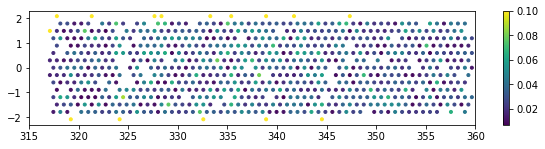

In [199]:
plt.figure(figsize=(10,2.1))
plt.scatter(ra_new,dec_new,c=obiwan_bad_arr_new/sim_bad_arr_new, marker = '.',vmax=0.1)
plt.colorbar()
plt.gca().set_xlim((315,360))


In [154]:
obiwan_bad_arr_new/sim_bad_arr_new

array([ 0.25,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ])

In [190]:
obiwan_bad_arr_new/sim_bad_arr_new

array([ 0.25,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ])

In [201]:
#check missing rate:g=22.4-22.825
g_high = 22.825
g_low = 22.4
g_mag_sim = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g'])
sim_bad = sim[(g_mag_sim>g_low)&(g_mag_sim<g_high)]

In [205]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c1 = SkyCoord(ra=obiwan['ra']*u.degree, dec=obiwan['dec']*u.degree)
c2 = SkyCoord(ra=sim_bad['ra']*u.degree, dec=sim_bad['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1.5/3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
ob = obiwan[idx1]
sm = sim_bad[idx2]



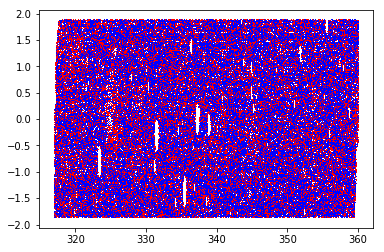

In [206]:
plt.plot(sim_bad['ra'],sim_bad['dec'],'r,')
plt.plot(sm['ra'],sm['dec'],'b,')


In [216]:
import healpy as hp
res=256
pix_sim = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'],nest = False, lonlat = True)
pix_sm = hp.ang2pix(res, sm['ra'], sm['dec'], nest = False, lonlat = True)

In [227]:
npo = 12*res**2
sim_arr = np.zeros(npo)
sm_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_sm)):
    n = pix_sm[i]
    sm_arr[n]+=1

In [228]:
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)

In [229]:
sim_arr_new = sim_arr[sim_arr>0]
sm_arr_new = sm_arr[sim_arr>0]
ra_new = ra[sim_arr>0]
dec_new = dec[sim_arr>0]

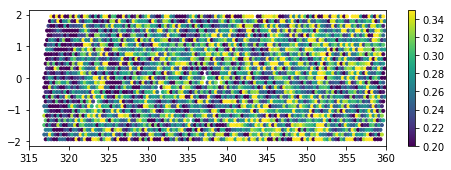

In [246]:
plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=sm_arr_new/sim_arr_new, marker = '.',vmax=0.35,vmin=0.2)
plt.gca().set_xlim(315,360)
plt.colorbar()

(array([  14.,    0.,    1.,    9.,   12.,   22.,   26.,   71.,  110.,
         139.,  254.,  339.,  419.,  389.,  411.,  330.,  277.,  175.,
         103.,   55.,   57.,   23.,   20.,    6.,    1.,   13.,    4.,
           2.,    0.,    0.,    2.,    1.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

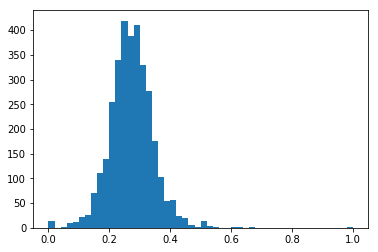

In [243]:
plt.hist(sm_arr_new/sim_arr_new,bins=50)

In [225]:
len(sim_arr)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

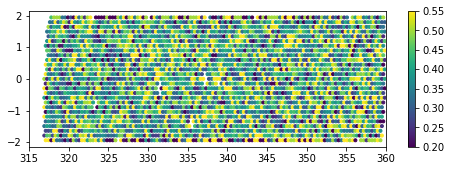

In [269]:
#check missing rate:g=22.4-22.825
g_high = 22.225
g_low = 21.825
g_mag_sim = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g'])
sim_bad = sim[(g_mag_sim>g_low)&(g_mag_sim<g_high)]

from astropy.coordinates import SkyCoord
from astropy import units as u
c1 = SkyCoord(ra=obiwan['ra']*u.degree, dec=obiwan['dec']*u.degree)
c2 = SkyCoord(ra=sim_bad['ra']*u.degree, dec=sim_bad['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1.5/3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
ob = obiwan[idx1]
sm = sim_bad[idx2]


import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'],nest = False, lonlat = True)
pix_sm = hp.ang2pix(res, sm['ra'], sm['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)

sim_arr = np.zeros(npo)
sm_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_sm)):
    n = pix_sm[i]
    sm_arr[n]+=1

sim_arr_new = sim_arr[sim_arr>0]
sm_arr_new = sm_arr[sim_arr>0]
ra_new = ra[sim_arr>0]
dec_new = dec[sim_arr>0]


plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=sm_arr_new/sim_arr_new, marker = '.',vmax=0.55,vmin=0.2)
plt.gca().set_xlim(315,360)
plt.colorbar()

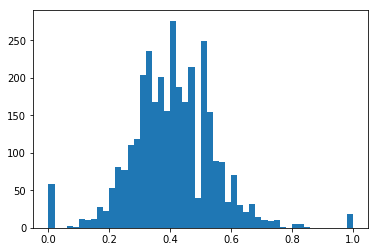

In [268]:
p = plt.hist(sm_arr_new/sim_arr_new,bins=50)

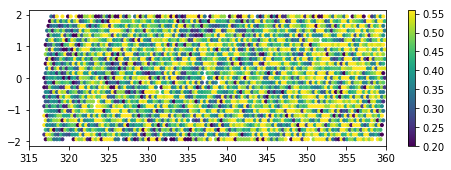

In [2]:
#check missing rate:g=22.4-22.825
mw_tm_g = sim['mw_transmission_g'].mean()
g_high = sim['gflux'].mean()+sim['gflux'].std()*0.2
g_low =  sim['gflux'].mean()-sim['gflux'].std()*0.2
g_mag_sim = sim['gflux']
sim_bad = sim[(g_mag_sim/sim['mw_transmission_g']>g_low/mw_tm_g)&(g_mag_sim/sim['mw_transmission_g']<g_high/mw_tm_g)]

from astropy.coordinates import SkyCoord
from astropy import units as u
c1 = SkyCoord(ra=obiwan['ra']*u.degree, dec=obiwan['dec']*u.degree)
c2 = SkyCoord(ra=sim_bad['ra']*u.degree, dec=sim_bad['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1.5/3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
ob = obiwan[idx1]
sm = sim_bad[idx2]


import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'],nest = False, lonlat = True)
pix_sm = hp.ang2pix(res, sm['ra'], sm['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)



sim_arr = np.zeros(npo)
sm_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_sm)):
    n = pix_sm[i]
    sm_arr[n]+=1




sim_arr_new = sim_arr[sim_arr>0]
sm_arr_new = sm_arr[sim_arr>0]
ra_new = ra[sim_arr>0]
dec_new = dec[sim_arr>0]


plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=sm_arr_new/sim_arr_new, marker = '.',vmax=0.56,vmin=0.2)
plt.gca().set_xlim(315,360)
plt.colorbar()

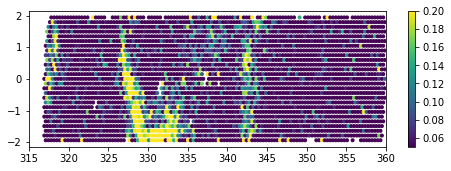

In [292]:
#check missing rate:g=22.4-22.825
g_high = sim['gflux'].mean()-sim['gflux'].std()*0.8
g_low =  sim['gflux'].mean()-sim['gflux'].std()*1.2
g_mag_sim = sim['gflux']
sim_bad = sim[(g_mag_sim>g_low)&(g_mag_sim<g_high)]

from astropy.coordinates import SkyCoord
from astropy import units as u
c1 = SkyCoord(ra=obiwan['ra']*u.degree, dec=obiwan['dec']*u.degree)
c2 = SkyCoord(ra=sim_bad['ra']*u.degree, dec=sim_bad['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1.5/3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
ob = obiwan[idx1]
sm = sim_bad[idx2]


import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'],nest = False, lonlat = True)
pix_sm = hp.ang2pix(res, sm['ra'], sm['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)



sim_arr = np.zeros(npo)
sm_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_sm)):
    n = pix_sm[i]
    sm_arr[n]+=1




sim_arr_new = sim_arr[sim_arr>0]
sm_arr_new = sm_arr[sim_arr>0]
ra_new = ra[sim_arr>0]
dec_new = dec[sim_arr>0]


plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=sm_arr_new/sim_arr_new, marker = '.',vmax=0.2,vmin=0.05)
plt.gca().set_xlim(315,360)
plt.colorbar()

In [250]:
sim['gflux'].mean(),sim['gflux'].std()

(0.81883077719517927, 0.24388172984485926)

Text(0.5,1,'22.225<g<22.625')

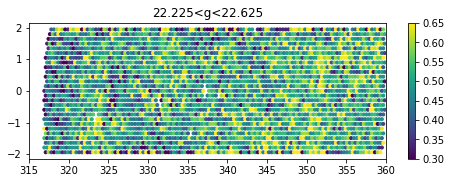

In [278]:
#check missing rate:g=22.4-22.825
g_high = 22.625
g_low = 22.225
g_mag_sim = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g'])
sim_bad = sim[(g_mag_sim>g_low)&(g_mag_sim<g_high)]

from astropy.coordinates import SkyCoord
from astropy import units as u
c1 = SkyCoord(ra=obiwan['ra']*u.degree, dec=obiwan['dec']*u.degree)
c2 = SkyCoord(ra=sim_bad['ra']*u.degree, dec=sim_bad['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1.5/3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
ob = obiwan[idx1]
sm = sim_bad[idx2]


import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'],nest = False, lonlat = True)
pix_sm = hp.ang2pix(res, sm['ra'], sm['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)

sim_arr = np.zeros(npo)
sm_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_sm)):
    n = pix_sm[i]
    sm_arr[n]+=1

sim_arr_new = sim_arr[sim_arr>0]
sm_arr_new = sm_arr[sim_arr>0]
ra_new = ra[sim_arr>0]
dec_new = dec[sim_arr>0]


plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=sm_arr_new/sim_arr_new, marker = '.',vmax=0.65,vmin=0.3)
plt.gca().set_xlim(315,360)
plt.colorbar()
plt.title('22.225<g<22.625')

Text(0.5,1,'22.625<g<22.825')

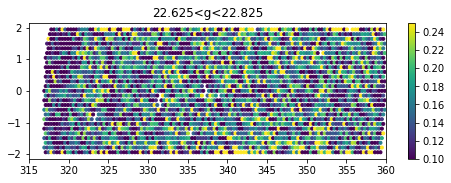

In [284]:
#check missing rate:g=22.4-22.825
g_high = 22.825
g_low = 22.625
g_mag_sim = 22.5 - 2.5 * np.log10(sim['gflux'] / sim['mw_transmission_g'])
sim_bad = sim[(g_mag_sim>g_low)&(g_mag_sim<g_high)]

from astropy.coordinates import SkyCoord
from astropy import units as u
c1 = SkyCoord(ra=obiwan['ra']*u.degree, dec=obiwan['dec']*u.degree)
c2 = SkyCoord(ra=sim_bad['ra']*u.degree, dec=sim_bad['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1.5/3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
ob = obiwan[idx1]
sm = sim_bad[idx2]


import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'],nest = False, lonlat = True)
pix_sm = hp.ang2pix(res, sm['ra'], sm['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)

sim_arr = np.zeros(npo)
sm_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_sm)):
    n = pix_sm[i]
    sm_arr[n]+=1

sim_arr_new = sim_arr[sim_arr>0]
sm_arr_new = sm_arr[sim_arr>0]
ra_new = ra[sim_arr>0]
dec_new = dec[sim_arr>0]


plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=sm_arr_new/sim_arr_new, marker = '.',vmax=0.25,vmin=0.1)
plt.gca().set_xlim(315,360)
plt.colorbar()
plt.title('22.625<g<22.825')